# Designing a Visualization for Your Manager

***

## Project Description

The Sales - Superstore dataset contains detailed information about your company’s sales. Your manager, Sylvia, has made a decision to cut the three worst performing sub-categories in their region in terms of Sales. To do this, she has asked you to create one data visualization that will identify which three sub-categories are the worst performers by region, and show how much worse they perform than other sub-categories. Sylvia will use this visualization to inform which product categories to cut, and in which regions.

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero
from numpy import median
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')


# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("Superstore.csv",parse_dates=['Order Date','Ship Date'])

In [3]:
df

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,Segment,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,2011-04-01,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,Consumer,2011-08-01,Standard Class,Texas,Paper,0.20,1,6,0.34,2,16
1,Office Supplies,Naperville,United States,Phillina Ober,GBC,2011-05-01,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,Home Office,2011-09-01,Standard Class,Illinois,Binders,0.80,1,-5,-1.55,2,4
2,Office Supplies,Naperville,United States,Phillina Ober,Avery,2011-05-01,CA-2011-112326,60540,Avery 508,Central,Home Office,2011-09-01,Standard Class,Illinois,Labels,0.20,1,4,0.36,3,12
3,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,2011-05-01,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,Home Office,2011-09-01,Standard Class,Illinois,Storage,0.20,1,-65,-0.24,3,273
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,2011-06-01,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,Consumer,2011-01-13,Standard Class,Pennsylvania,Art,0.20,1,5,0.25,3,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Office Supplies,Loveland,United States,Jill Matthias,Other,2014-12-31,CA-2014-156720,80538,Bagged Rubber Bands,West,Consumer,2015-04-01,Standard Class,Colorado,Fasteners,0.20,1,-1,-0.20,3,3
9990,Office Supplies,Fairfield,United States,Erica Bern,Cardinal,2014-12-31,CA-2014-115427,94533,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",West,Corporate,2015-04-01,Standard Class,California,Binders,0.20,1,5,0.33,2,14
9991,Office Supplies,Fairfield,United States,Erica Bern,GBC,2014-12-31,CA-2014-115427,94533,GBC Binding covers,West,Corporate,2015-04-01,Standard Class,California,Binders,0.20,1,6,0.31,2,21
9992,Technology,New York City,United States,Patrick O'Donnell,Other,2014-12-31,CA-2014-143259,10009,Gear Head AU3700S Headset,East,Consumer,2015-04-01,Standard Class,New York,Phones,0.00,1,3,0.03,7,91


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Category           9994 non-null   object        
 1   City               9994 non-null   object        
 2   Country            9994 non-null   object        
 3   Customer Name      9994 non-null   object        
 4   Manufacturer       9994 non-null   object        
 5   Order Date         9994 non-null   datetime64[ns]
 6   Order ID           9994 non-null   object        
 7   Postal Code        9994 non-null   int64         
 8   Product Name       9994 non-null   object        
 9   Region             9994 non-null   object        
 10  Segment            9994 non-null   object        
 11  Ship Date          9994 non-null   datetime64[ns]
 12  Ship Mode          9994 non-null   object        
 13  State              9994 non-null   object        
 14  Sub-Cate

In [5]:
df.describe(include='all')

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,Segment,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
count,9994,9994,9994,9994,9994,9994,9994,9994.00,9994,9994,9994,9994,9994,9994,9994,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00
unique,3,531,1,793,174,1238,5009,NaN,1841,4,3,1334,4,49,17,NaN,NaN,NaN,NaN,NaN,NaN
top,Office Supplies,New York City,United States,William Brown,Other,2013-06-09 00:00:00,CA-2014-100111,NaN,Staples,West,Consumer,2012-12-16 00:00:00,Standard Class,California,Binders,NaN,NaN,NaN,NaN,NaN,NaN
freq,6026,915,9994,37,2074,38,14,NaN,227,3203,5191,35,5968,2001,1523,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2011-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,2011-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2014-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,2015-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55190.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.16,1.00,28.65,0.12,3.79,229.87
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32063.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,0.00,234.26,0.47,2.23,623.25
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1.00,-6600.00,-2.75,1.00,0.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1.00,2.00,0.07,2.00,17.00


In [6]:
df.columns

Index(['Category', 'City', 'Country', 'Customer Name', 'Manufacturer', 'Order Date', 'Order ID', 'Postal Code', 'Product Name', 'Region', 'Segment', 'Ship Date', 'Ship Mode', 'State', 'Sub-Category', 'Discount', 'Number of Records', 'Profit', 'Profit Ratio', 'Quantity', 'Sales'], dtype='object')

## Data Visualization

### Univariate Data Exploration

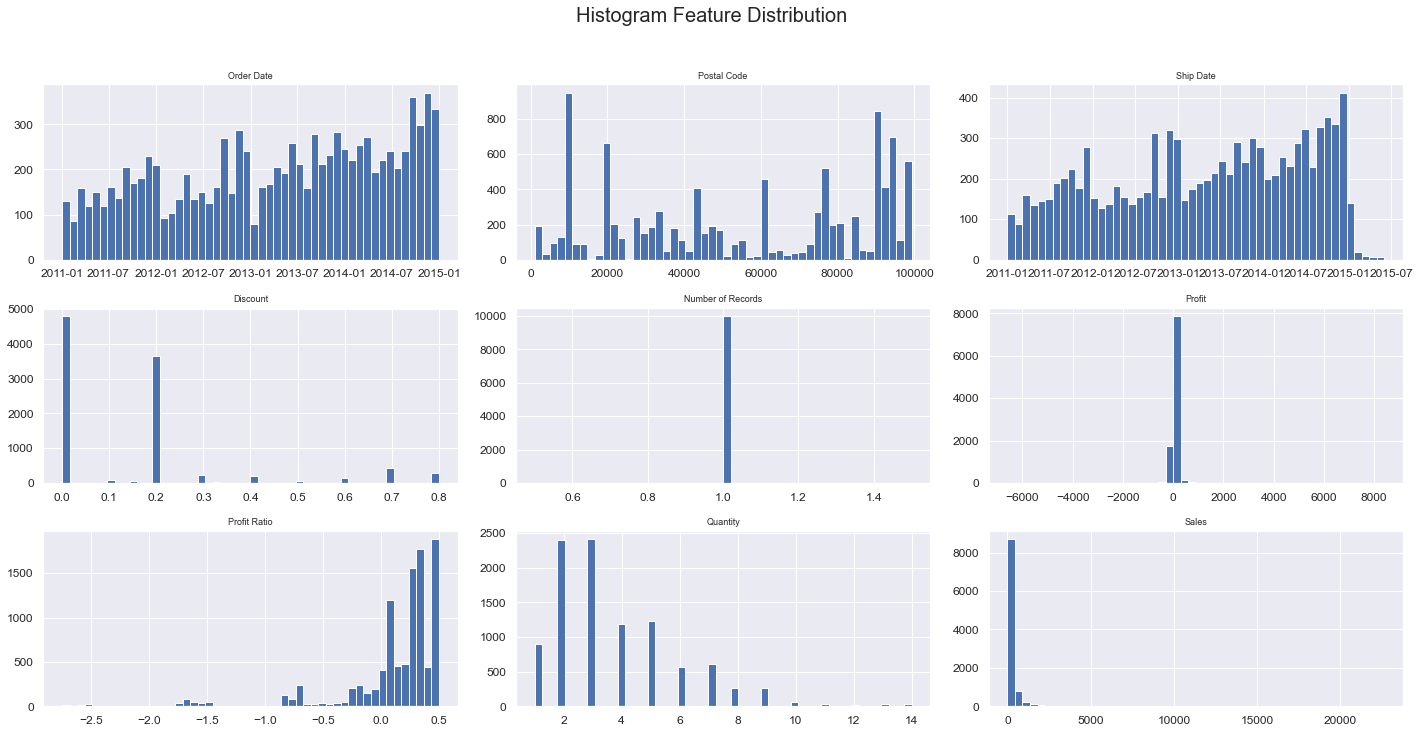

In [7]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

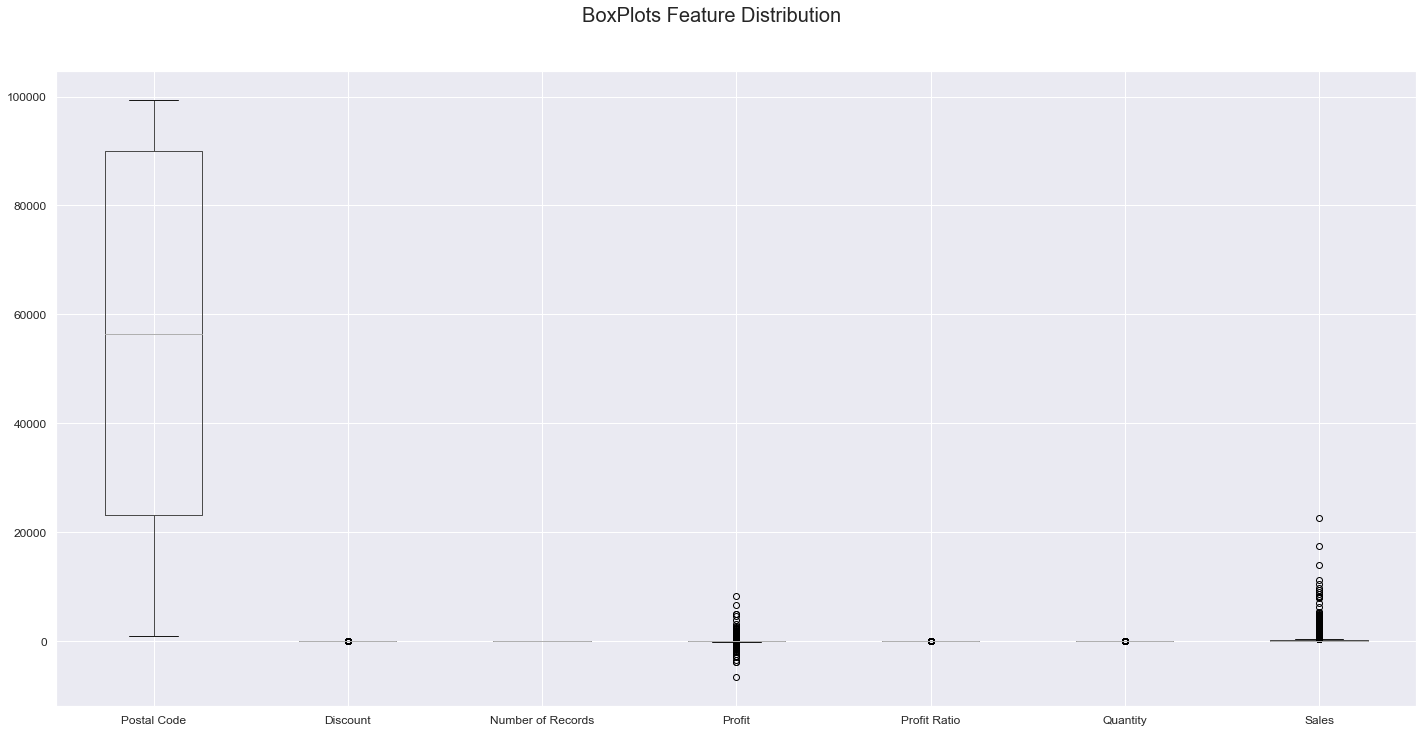

In [8]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [9]:
df.columns

Index(['Category', 'City', 'Country', 'Customer Name', 'Manufacturer', 'Order Date', 'Order ID', 'Postal Code', 'Product Name', 'Region', 'Segment', 'Ship Date', 'Ship Mode', 'State', 'Sub-Category', 'Discount', 'Number of Records', 'Profit', 'Profit Ratio', 'Quantity', 'Sales'], dtype='object')

In [10]:
df2 = df[['Category','Region', 'Segment', 'State', 'Sub-Category', 'Profit', 'Quantity', 'Sales']]
df2

,Category,Region,Segment,State,Sub-Category,Profit,Quantity,Sales
0,Office Supplies,Central,Consumer,Texas,Paper,6,2,16
1,Office Supplies,Central,Home Office,Illinois,Binders,-5,2,4
2,Office Supplies,Central,Home Office,Illinois,Labels,4,3,12
3,Office Supplies,Central,Home Office,Illinois,Storage,-65,3,273
4,Office Supplies,East,Consumer,Pennsylvania,Art,5,3,20
...,...,...,...,...,...,...,...,...
9989,Office Supplies,West,Consumer,Colorado,Fasteners,-1,3,3
9990,Office Supplies,West,Corporate,California,Binders,5,2,14
9991,Office Supplies,West,Corporate,California,Binders,6,2,21
9992,Technology,East,Consumer,New York,Phones,3,7,91


### Groupby Function

In [11]:
d1 = df2.groupby(["Category"]).sum()
d1

,Profit,Quantity,Sales
Category,,,
Furniture,18444,8028,742006
Office Supplies,122474,22906,719127
Technology,145429,6939,836221


In [12]:
d2 = df2.groupby(["Region"]).sum()
d2

,Profit,Quantity,Sales
Region,,,
Central,39719,8780,501256
East,91521,10618,678834
South,46721,6209,391750
West,108386,12266,725514


In [13]:
d3 = df2.groupby(["Segment"]).sum()
d3

,Profit,Quantity,Sales
Segment,,,
Consumer,134113,19521,1161497
Corporate,91965,11608,706183
Home Office,60269,6744,429674


In [14]:
d4 = df2.groupby(["State"]).sum().nsmallest(10, columns=["Profit"])
d4

,Profit,Quantity,Sales
State,,,
Texas,-25714,3724,170187
Ohio,-16962,1759,78253
Pennsylvania,-15550,2153,116522
Illinois,-12607,1845,80162
North Carolina,-7495,983,55604
Colorado,-6527,693,32110
Tennessee,-5347,681,30662
Arizona,-3432,862,35283
Florida,-3412,1379,89479


In [15]:
d5 = df2.groupby(["Sub-Category"]).sum().nsmallest(10, columns=["Profit"])
d5

,Profit,Quantity,Sales
Sub-Category,,,
Tables,-17733,1241,206968
Bookcases,-3479,868,114879
Supplies,-1187,647,46679
Fasteners,952,914,3024
Machines,3387,440,189243
Labels,5558,1400,12507
Art,6530,3000,27137
Envelopes,6956,906,16477
Furnishings,13070,3563,91705


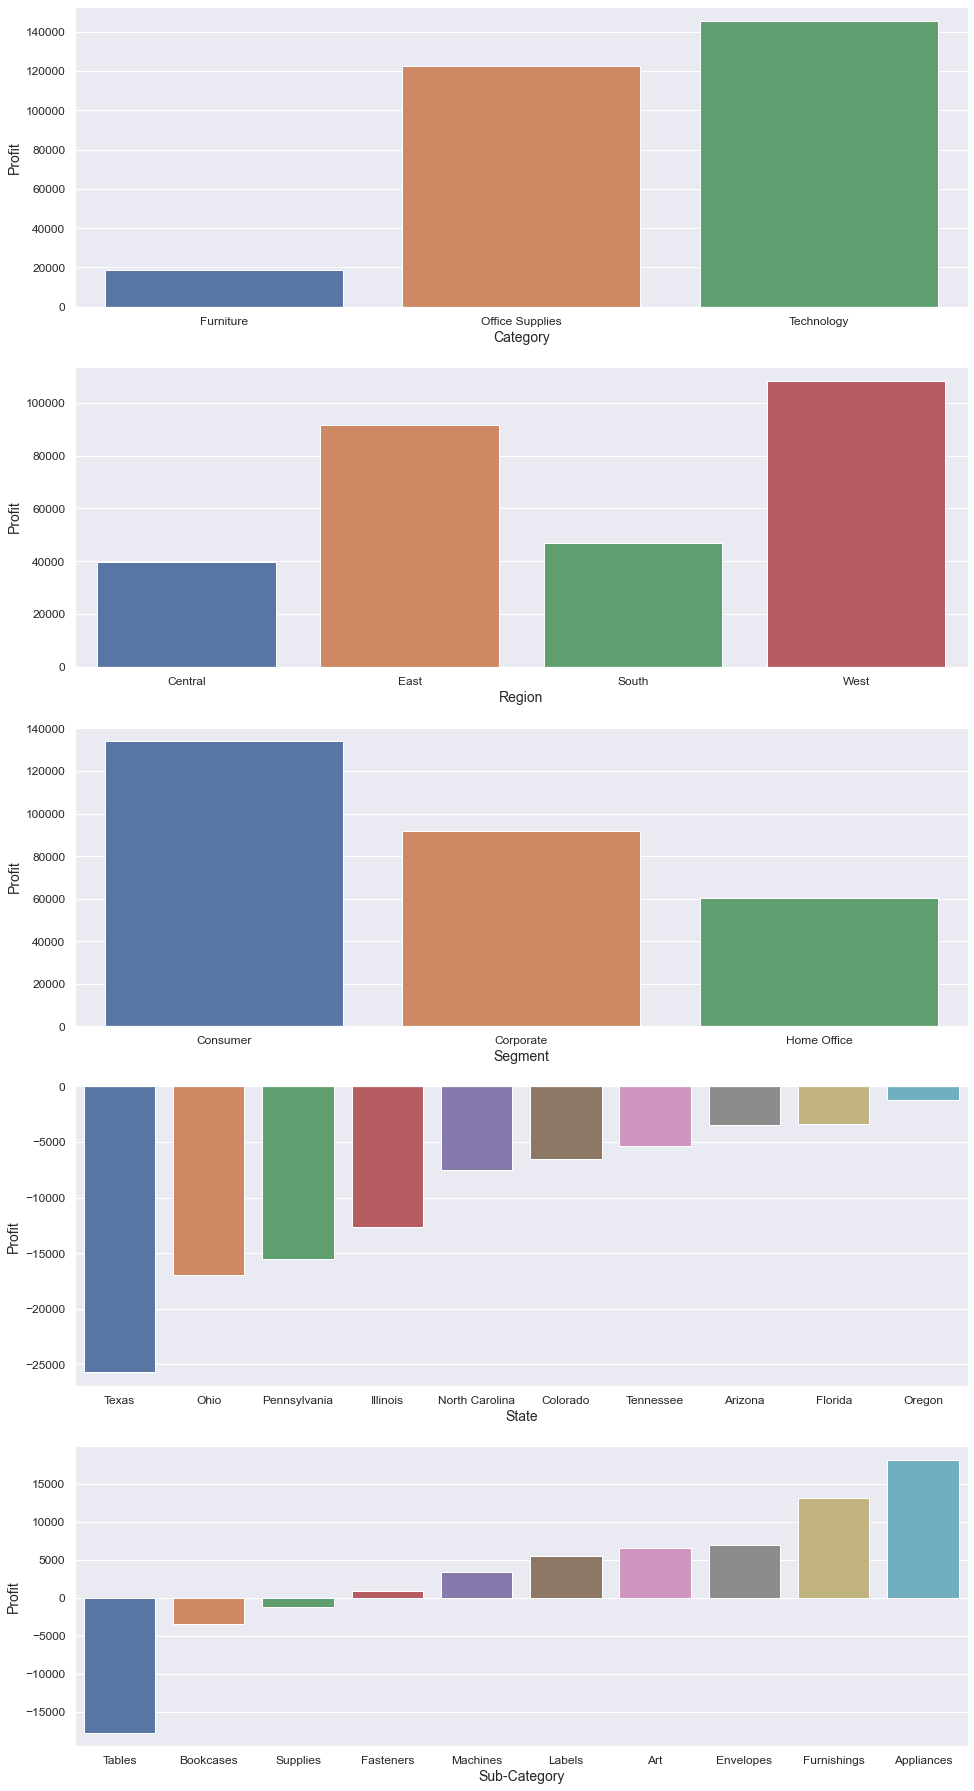

In [16]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(5,1, sharex=False, figsize=(16,32))
#fig.suptitle('Bar Plots')


sns.barplot(x=d1.index, y="Profit", data=d1, ax=ax[0])
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)

sns.barplot(x=d2.index, y="Profit", data=d2, ax=ax[1])
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)

sns.barplot(x=d3.index, y="Profit", data=d3, ax=ax[2])
#ax[2].set_title('Title of the third chart')
#ax[2].tick_params('x', labelrotation=45)

sns.barplot(x=d4.index, y="Profit", data=d4, ax=ax[3])
#ax[3].set_title('Title of the fourth chart')
#ax[3].tick_params('x', labelrotation=45)

sns.barplot(x=d5.index, y="Profit", data=d5, ax=ax[4])
#ax[3].set_title('Title of the fourth chart')
#ax[3].tick_params('x', labelrotation=45)

plt.show()

In [17]:
df3 = df2[(df2["Sub-Category"] == "Tables") | (df2["Sub-Category"] == "Bookcases") | (df2["Sub-Category"] == "Supplies")]
df3

,Category,Region,Segment,State,Sub-Category,Profit,Quantity,Sales
27,Furniture,West,Consumer,California,Bookcases,4,3,334
32,Furniture,East,Corporate,Pennsylvania,Bookcases,-53,4,62
39,Furniture,West,Consumer,Arizona,Bookcases,-321,5,181
63,Furniture,Central,Corporate,South Dakota,Bookcases,40,2,142
72,Furniture,West,Consumer,California,Tables,-17,3,333
...,...,...,...,...,...,...,...,...
9931,Furniture,East,Consumer,New York,Bookcases,5,2,192
9940,Furniture,East,Consumer,Ohio,Tables,-105,2,273
9949,Office Supplies,Central,Consumer,Texas,Supplies,5,7,45
9958,Furniture,Central,Consumer,Texas,Bookcases,-12,2,79


In [18]:
df3.reset_index(inplace=True, drop=True)

In [19]:
df3

,Category,Region,Segment,State,Sub-Category,Profit,Quantity,Sales
0,Furniture,West,Consumer,California,Bookcases,4,3,334
1,Furniture,East,Corporate,Pennsylvania,Bookcases,-53,4,62
2,Furniture,West,Consumer,Arizona,Bookcases,-321,5,181
3,Furniture,Central,Corporate,South Dakota,Bookcases,40,2,142
4,Furniture,West,Consumer,California,Tables,-17,3,333
...,...,...,...,...,...,...,...,...
732,Furniture,East,Consumer,New York,Bookcases,5,2,192
733,Furniture,East,Consumer,Ohio,Tables,-105,2,273
734,Office Supplies,Central,Consumer,Texas,Supplies,5,7,45
735,Furniture,Central,Consumer,Texas,Bookcases,-12,2,79


### Create Pivot Tables

In [20]:
table1 = pd.pivot_table(data=df3, values="Profit", index=["Sub-Category","Segment"], aggfunc='sum', 
                        columns=["State"])

In [21]:
table1

State                     Alabama  Arizona  Arkansas  California  Colorado  Connecticut  Delaware  Florida  Georgia  Idaho  Illinois  Indiana   Iowa  Kansas  Kentucky  Louisiana  Maryland  Massachusetts  Michigan  Minnesota  Mississippi  Missouri  Nebraska  Nevada  New Hampshire  New Jersey  New Mexico  New York  North Carolina     Ohio  Oklahoma  Oregon  Pennsylvania  Rhode Island  South Dakota  Tennessee    Texas   Utah  Vermont  Virginia  Washington  West Virginia  Wisconsin
Sub-Category Segment                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
Bookcases    Consumer         NaN  -513.00    172.00      454.00  -1856.00          NaN    139.00  -141.00   755.00    NaN   -387.00      NaN    NaN     NaN     42.00      57.00     67.00         204.00       NaN        NaN       126.00       NaN       NaN   41.00            NaN      141.00         NaN    -18.00          -66.00  -425.00     55.00 -489.00      -2299.00           NaN           NaN        NaN -1335.00 141.00      NaN    275.00      251.00            NaN     170.00
             Corporate        NaN  -357.00       NaN      690.00   -555.00       456.00    338.00    17.00    76.00    NaN   -132.00      NaN    NaN     NaN       NaN        NaN     38.00         103.00     52.00        NaN          NaN     53.00       NaN     NaN            NaN         NaN         NaN    236.00          -32.00  -886.00       NaN -128.00       -386.00         51.00         40.00       8.00  -826.00  78.00  1013.00       NaN      260.00            NaN     431.00
             Home Office      NaN      NaN       NaN      272.00       NaN          NaN       NaN     8.00    53.00    NaN    -36.00      NaN    NaN     NaN       NaN        NaN       NaN         106.00     98.00        NaN          NaN       NaN       NaN     NaN            NaN         NaN         NaN    134.00             NaN   -49.00       NaN     NaN       -211.00         79.00           NaN     -15.00  -229.00    NaN      NaN      4.00       60.00            NaN      48.00
Supplies     Consumer        2.00     4.00       NaN      501.00   -292.00        22.00       NaN    -3.00     0.00    NaN     12.00      NaN    NaN     NaN       NaN      33.00      7.00           0.00      0.00      11.00          NaN       NaN      5.00     NaN            NaN       24.00        0.00    191.00            7.00    -3.00       NaN    1.00      -1413.00           NaN          7.00       8.00  -815.00    NaN      NaN     21.00       11.00            NaN        NaN
             Corporate      10.00     1.00       NaN      339.00       NaN         8.00       NaN  -194.00    10.00    NaN      3.00      NaN    NaN     NaN      8.00        NaN       NaN            NaN       NaN        NaN          NaN     99.00       NaN     NaN            NaN         NaN         NaN     66.00          -39.00   -80.00      6.00   -4.00        -43.00         35.00           NaN        NaN    -5.00    NaN      NaN     95.00       27.00            NaN        NaN
             Home Office      NaN   -35.00       NaN       22.00      1.00          NaN       NaN    -1.00      NaN    NaN       NaN      NaN    NaN    7.00     11.00        NaN       NaN           7.00     21.00        NaN          NaN       NaN       NaN   25.00           8.00        8.00        4.00      9.00            4.00      NaN       NaN    1.00         -3.00           NaN           NaN        NaN   -16.00  12.00      NaN     31.00        8.00            NaN       6.00
Tables       Consumer      200.00  -992.00     45.00     -125.00   -509.00       -16.00    -49.00 -1300.00      NaN    NaN  -2970.00   1

In [22]:
table1.describe()

State,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin
count,4.00,8.00,2.00,9.00,6.00,5.00,4.00,9.00,6.00,1.00,8.00,3.00,1.00,1.00,4.00,3.00,4.00,8.00,6.00,3.00,2.00,4.00,1.00,4.00,2.00,4.00,2.00,9.00,8.00,8.00,5.00,8.00,9.00,5.00,2.00,6.00,9.00,4.00,1.00,8.00,9.00,1.00,5.00
mean,141.75,-397.62,108.50,218.78,-612.83,93.20,97.75,-311.89,172.00,420.00,-606.38,137.67,107.00,7.00,55.25,152.67,10.25,-15.75,209.67,93.67,268.50,128.25,5.00,125.75,-48.50,30.50,2.00,-435.22,-476.25,-519.75,128.20,-208.62,-771.44,-13.20,23.50,-443.67,-604.56,147.50,1013.00,370.62,610.33,-77.00,160.40
std,169.07,413.11,89.80,301.13,642.01,203.30,181.76,461.73,289.91,NaN,1001.74,91.48,NaN,NaN,71.50,186.87,59.45,165.25,352.21,81.05,201.53,69.18,NaN,135.58,79.90,80.42,2.83,1017.58,1031.43,573.34,138.78,231.56,750.28,102.25,23.33,536.62,617.41,150.52,NaN,419.52,790.18,NaN,165.81
min,2.00,-1000.00,45.00,-125.00,-1856.00,-16.00,-49.00,-1300.00,0.00,420.00,-2970.00,67.00,107.00,7.00,8.00,33.00,-71.00,-298.00,0.00,11.00,126.00,53.00,5.00,25.00,-105.00,-51.00,0.00,-2487.00,-2964.00,-1725.00,6.00,-569.00,-2299.00,-170.00,7.00,-1174.00,-1740.00,12.00,1013.00,4.00,8.00,-77.00,6.00
25%,8.00,-632.75,76.75,-69.00,-543.50,-4.00,-40.00,-350.00,20.75,420.00,-572.25,86.00,107.00,7.00,10.25,45.00,-12.50,-88.50,28.75,54.00,197.25,87.50,5.00,37.00,-76.75,-6.75,1.00,-132.00,-220.50,-671.50,55.00,-392.25,-1126.00,-61.00,15.25,-873.75,-826.00,61.50,1013.00,28.50,27.00,-77.00,48.00
50%,105.00,-323.00,108.50,272.00,-487.50,8.00,51.00,-141.00,64.50,420.00,-259.50,105.00,107.00,7.00,26.50,57.00,22.50,3.50,75.00,97.00,268.50,122.50,5.00,79.00,-48.50,16.00,2.00,9.00,-37.50,-407.50,55.00,-124.50,-580.00,35.00,23.50,-250.50,-330.00,109.50,1013.00,185.00,251.00,-77.00,147.00
75%,238.75,-26.00,140.25,454.00,-335.50,22.00,188.75,-1.00,122.50,420.00,-26.25,173.00,107.00,7.00,71.50,212.50,45.25,103.75,151.25,135.00,339.75,163.25,5.00,167.75,-20.25,53.25,3.00,134.00,-23.00,-72.25,175.00,-2.75,-211.00,51.00,31.75,2.25,-145.00,195.50,1013.00,684.75,1277.00,-77.00,170.00
max,355.00,4.00,172.00,690.00,1.00,456.00,338.00,17.00,755.00,420.00,12.00,241.00,107.00,7.00,160.00,368.00,67.00,204.00,918.00,173.00,411.00,215.00,5.00,320.00,8.00,141.00,4.00,236.00,7.00,-3.00,350.00,1.00,-3.00,79.00,40.00,8.00,-5.00,359.00,1013.00,988.00,2029.00,-77.00,431.00


In [23]:
table1.mean()

State
Alabama           141.75
Arizona          -397.62
Arkansas          108.50
California        218.78
Colorado         -612.83
Connecticut        93.20
Delaware           97.75
Florida          -311.89
Georgia           172.00
Idaho             420.00
Illinois         -606.38
Indiana           137.67
Iowa              107.00
Kansas              7.00
Kentucky           55.25
Louisiana         152.67
Maryland           10.25
Massachusetts     -15.75
Michigan          209.67
Minnesota          93.67
Mississippi       268.50
Missouri          128.25
Nebraska            5.00
Nevada            125.75
New Hampshire     -48.50
New Jersey         30.50
New Mexico          2.00
New York         -435.22
North Carolina   -476.25
Ohio             -519.75
Oklahoma          128.20
Oregon           -208.62
Pennsylvania     -771.44
Rhode Island      -13.20
South Dakota       23.50
Tennessee        -443.67
Texas            -604.56
Utah              147.50
Vermont          1013.00
Virginia          3

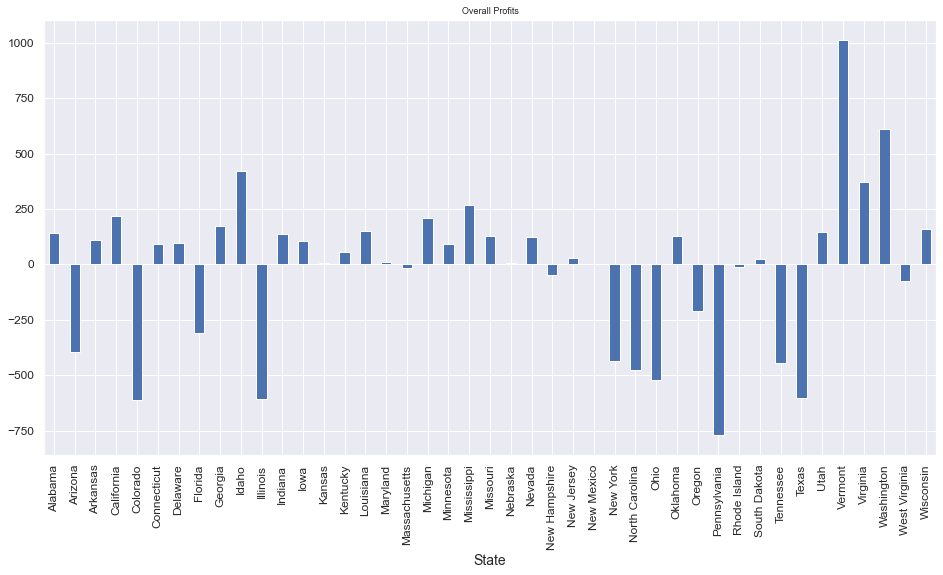

In [24]:
table1.mean().plot(kind="bar", figsize=(16,8), title="Overall Profits")
plt.show()

In [25]:
table2 = table1.mean()

In [26]:
table2.sort_values().head()

State
Pennsylvania   -771.44
Colorado       -612.83
Illinois       -606.38
Texas          -604.56
Ohio           -519.75
dtype: float64

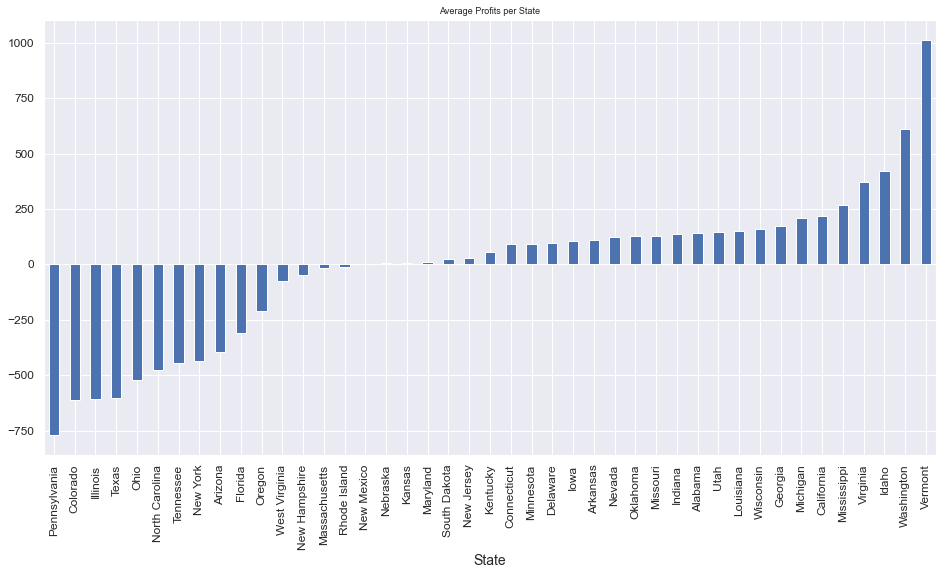

In [28]:
table2.sort_values().plot(kind="bar", figsize=(16,8), title="Average Profits per State")
plt.show()

#### Python code done by Dennis Lam